<a href="https://colab.research.google.com/github/ju-arauj/Projeto_Aplicado_III/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise exploratória e tratamento
 Nesta primeira etapa, nosso objetivo é ter uma visão geral dos conjuntos de dados, identificar os tipos de cada coluna, unir as bases de dados, verificar se há dados faltantes e duplicados e obter algumas estatísticas descritivas básicas.


In [ ]:
import pandas as pd
!pip install "numpy<2" --upgrade
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_products = pd.read_csv("product_info.csv")
df_products.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [ ]:
df_products.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [ ]:
df_reviews = pd.read_csv("reviews_0-250.csv")
df_reviews.head()

/tmp/ipython-input-91014049.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv("reviews_0-250.csv")


,Unnamed: 0,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,0,1741593524,5,1.0,1.0,2,0,2,2023-02-01,I use this with the Nudestix “Citrus Clean Bal...,Taught me how to double cleanse!,NaN,brown,dry,black,P504322,Gentle Hydra-Gel Face Cleanser,NUDESTIX,19.0
1,1,31423088263,1,0.0,NaN,0,0,0,2023-03-21,I bought this lip mask after reading the revie...,Disappointed,NaN,NaN,NaN,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
2,2,5061282401,5,1.0,NaN,0,0,0,2023-03-21,My review title says it all! I get so excited ...,New Favorite Routine,light,brown,dry,blonde,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
3,3,6083038851,5,1.0,NaN,0,0,0,2023-03-20,I’ve always loved this formula for a long time...,Can't go wrong with any of them,NaN,brown,combination,black,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0
4,4,47056667835,5,1.0,NaN,0,0,0,2023-03-20,"If you have dry cracked lips, this is a must h...",A must have !!!,light,hazel,combination,NaN,P420652,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,24.0


In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                602130 non-null  int64  
 1   author_id                 602130 non-null  object 
 2   rating                    602130 non-null  int64  
 3   is_recommended            484644 non-null  float64
 4   helpfulness               270298 non-null  float64
 5   total_feedback_count      602130 non-null  int64  
 6   total_neg_feedback_count  602130 non-null  int64  
 7   total_pos_feedback_count  602130 non-null  int64  
 8   submission_time           602130 non-null  object 
 9   review_text               601131 non-null  object 
 10  review_title              435119 non-null  object 
 11  skin_tone                 496074 non-null  object 
 12  eye_color                 463642 non-null  object 
 13  skin_type                 527447 non-null  o

In [ ]:
df_reviews.columns

Index(['Unnamed: 0', 'author_id', 'rating', 'is_recommended', 'helpfulness',
       'total_feedback_count', 'total_neg_feedback_count',
       'total_pos_feedback_count', 'submission_time', 'review_text',
       'review_title', 'skin_tone', 'eye_color', 'skin_type', 'hair_color',
       'product_id', 'product_name', 'brand_name', 'price_usd'],
      dtype='object')

In [ ]:
colunas_para_manter = [
    'author_id',
    'product_id',
    'rating',
    'is_recommended',
    'skin_type',
    'skin_tone',
    'eye_color',
    'hair_color'
]

In [ ]:
df_reviews_selecionadas = df_reviews[colunas_para_manter].copy()
df_reviews_selecionadas.head()

,author_id,product_id,rating,is_recommended,skin_type,skin_tone,eye_color,hair_color
0,1741593524,P504322,5,1.0,dry,NaN,brown,black
1,31423088263,P420652,1,0.0,NaN,NaN,NaN,NaN
2,5061282401,P420652,5,1.0,dry,light,brown,blonde
3,6083038851,P420652,5,1.0,combination,NaN,brown,black
4,47056667835,P420652,5,1.0,combination,light,hazel,NaN


In [ ]:
df = pd.merge(df_reviews_selecionadas, df_products, on='product_id', how='inner')

In [ ]:
df.head()

,author_id,product_id,rating_x,is_recommended,skin_type,skin_tone,eye_color,hair_color,product_name,brand_id,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,1741593524,P504322,5,1.0,dry,NaN,brown,black,Gentle Hydra-Gel Face Cleanser,7055,...,1,0,0,['Clean at Sephora'],Skincare,Cleansers,NaN,0,NaN,NaN
1,31423088263,P420652,1,0.0,NaN,NaN,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,6125,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
2,5061282401,P420652,5,1.0,dry,light,brown,blonde,Lip Sleeping Mask Intense Hydration with Vitam...,6125,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
3,6083038851,P420652,5,1.0,combination,NaN,brown,black,Lip Sleeping Mask Intense Hydration with Vitam...,6125,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0
4,47056667835,P420652,5,1.0,combination,light,hazel,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,6125,...,0,0,1,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN,3,24.0,24.0


In [ ]:
print(f"\nO dataset final tem {df.shape[0]} linhas e {df.shape[1]} colunas.")


O dataset final tem 602130 linhas e 34 colunas.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 34 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   author_id           602130 non-null  object 
 1   product_id          602130 non-null  object 
 2   rating_x            602130 non-null  int64  
 3   is_recommended      484644 non-null  float64
 4   skin_type           527447 non-null  object 
 5   skin_tone           496074 non-null  object 
 6   eye_color           463642 non-null  object 
 7   hair_color          461049 non-null  object 
 8   product_name        602130 non-null  object 
 9   brand_id            602130 non-null  int64  
 10  brand_name          602130 non-null  object 
 11  loves_count         602130 non-null  int64  
 12  rating_y            602130 non-null  float64
 13  reviews             602130 non-null  float64
 14  size                585841 non-null  object 
 15  variation_type      584741 non-nul

In [ ]:
def limpar_nulos(df):

  colunas_para_remover = []

  for col in df.columns:
    percentual_nulos = df[col].isnull().sum() / len(df)
    if percentual_nulos > 0.20:
      colunas_para_remover.append(col)

  print("Colunas a serem removidas:", colunas_para_remover)


  df_limpo = df.drop(columns = colunas_para_remover)


  return df_limpo



In [ ]:
df = limpar_nulos(df)
df.info()

Colunas a serem removidas: ['eye_color', 'hair_color', 'variation_desc', 'value_price_usd', 'sale_price_usd', 'child_max_price', 'child_min_price']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602130 entries, 0 to 602129
Data columns (total 27 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   author_id           602130 non-null  object 
 1   product_id          602130 non-null  object 
 2   rating_x            602130 non-null  int64  
 3   is_recommended      484644 non-null  float64
 4   skin_type           527447 non-null  object 
 5   skin_tone           496074 non-null  object 
 6   product_name        602130 non-null  object 
 7   brand_id            602130 non-null  int64  
 8   brand_name          602130 non-null  object 
 9   loves_count         602130 non-null  int64  
 10  rating_y            602130 non-null  float64
 11  reviews             602130 non-null  float64
 12  size                585841 non-null 

###Seleção de atributos

In [ ]:
df = df.drop(columns = ['size', 'variation_type', 'variation_value', 'out_of_stock', 'brand_id', 'child_count', 'limited_edition', 'new', 'online_only', 'sephora_exclusive'])

In [ ]:
novos_nomes = {
    'rating_x': 'user_rating',
    'rating_y': 'avg_product_rating'
}

df = df.rename(columns=novos_nomes)


In [ ]:
df.columns

Index(['author_id', 'product_id', 'user_rating', 'is_recommended', 'skin_type',
       'skin_tone', 'product_name', 'brand_name', 'loves_count',
       'avg_product_rating', 'reviews', 'ingredients', 'price_usd',
       'highlights', 'primary_category', 'secondary_category',
       'tertiary_category'],
      dtype='object')

###Variáveis restantes:
author_id: O identificador único para cada cliente/usuário que escreveu uma avaliação.

product_id: O identificador único do produto que está sendo avaliado.

user_rating: A nota (de 1 a 5, por exemplo) que o author_id deu ao product_id nesta avaliação específica.

is_recommended: Um "Sim" ou "Não" (ou 1/0) indicando se o usuário recomendou o produto naquela avaliação.

skin_type, skin_tone: Características físicas do usuário que escreveu a avaliação, como "oleosa", "seca", "clara", "escura", etc.

product_name: O nome comercial do produto (ex: "La Habana Eau de Parfum").

brand_name: O nome da marca.

loves_count: O número total de "likes" ou "loves" que o produto recebeu no site. É um forte indicador de popularidade.

avg_product_rating: A nota média geral do produto.

reviews: O número total de avaliações que este produto já recebeu.

ingredients: A lista de ingredientes do produto.

price_usd: O preço do produto em dólares americanos.

highlights: Palavras-chave de marketing que descrevem os benefícios do produto (ex: "Longa duração", "Hidratante").

primary_category, secondary_category, tertiary_category: A categorização do produto em níveis, do mais geral ao mais específico (ex: primary="Fragrância", secondary="Mulher", tertiary="Perfume").



###Observação:

A variável user_rating é a nota específica que um usuário (author_id) deu em uma única avaliação. É a nota daquela linha.

Já a variável avg_product_rating é a nota média geral do produto, calculada a partir de todas as avaliações que ele já recebeu. É uma medida geral da qualidade do produto.

In [ ]:
df.head()

,author_id,product_id,user_rating,is_recommended,skin_type,skin_tone,product_name,brand_name,loves_count,avg_product_rating,reviews,ingredients,price_usd,highlights,primary_category,secondary_category,tertiary_category
0,1741593524,P504322,5,1.0,dry,NaN,Gentle Hydra-Gel Face Cleanser,NUDESTIX,177,5.0000,1.0,"['Water (Aqua), Dipropylene Glycol, Peg-6 Capr...",19.0,['Clean at Sephora'],Skincare,Cleansers,NaN
1,31423088263,P420652,1,0.0,NaN,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN
2,5061282401,P420652,5,1.0,dry,light,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN
3,6083038851,P420652,5,1.0,combination,NaN,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN
4,47056667835,P420652,5,1.0,combination,light,Lip Sleeping Mask Intense Hydration with Vitam...,LANEIGE,1081315,4.3508,16118.0,"['Diisostearyl Malate, Hydrogenated Polyisobut...",24.0,"['allure 2019 Best of Beauty Award Winner', 'C...",Skincare,Lip Balms & Treatments,NaN


###Distribuição das notas dos usuários (user_rating)

In [ ]:
df.user_rating.unique()

array([5, 1, 4, 2, 3])

/tmp/ipython-input-948578.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='user_rating', data=df, palette='viridis_r')


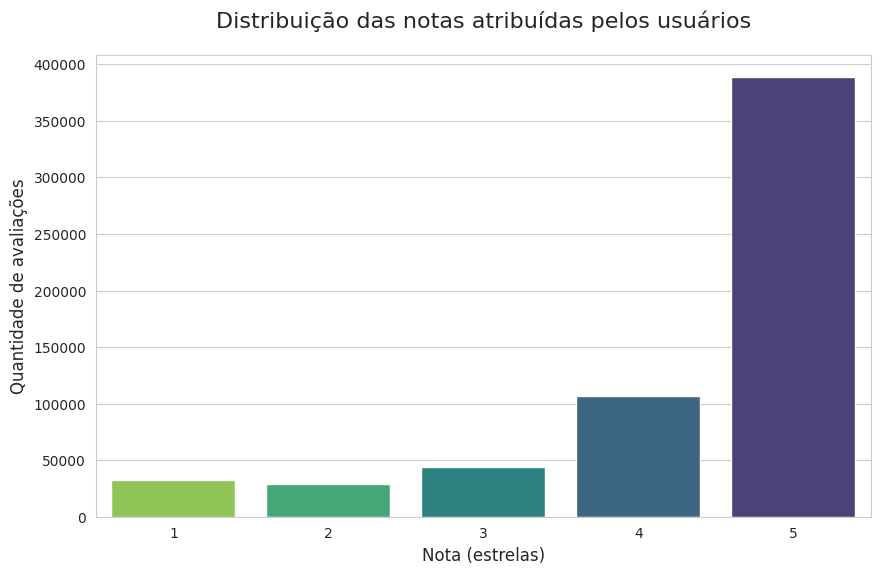

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

ax = sns.countplot(x='user_rating', data=df, palette='viridis_r')

ax.set_title('Distribuição das notas atribuídas pelos usuários', fontsize=16, pad=20)
ax.set_xlabel('Nota (estrelas)', fontsize=12)
ax.set_ylabel('Quantidade de avaliações', fontsize=12)

plt.show()

###Nota-se um viés de positividade nas avaliações feitas pelos usuários, pois a maior parte das avaliações pertencem às categorias 5 e 4, que representam notas mais altas.

In [ ]:
df.primary_category.unique()

array(['Skincare'], dtype=object)

In [ ]:
df = df.drop(columns = 'primary_category')

In [ ]:
df.secondary_category.unique()

array(['Cleansers', 'Lip Balms & Treatments', 'Moisturizers',
       'Treatments', 'Mini Size', 'Masks', 'Sunscreen', 'Eye Care',
       'Self Tanners', 'Value & Gift Sets'], dtype=object)

/tmp/ipython-input-1784475581.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=all_secondary_counts.values, y=all_secondary_counts.index, palette='viridis')


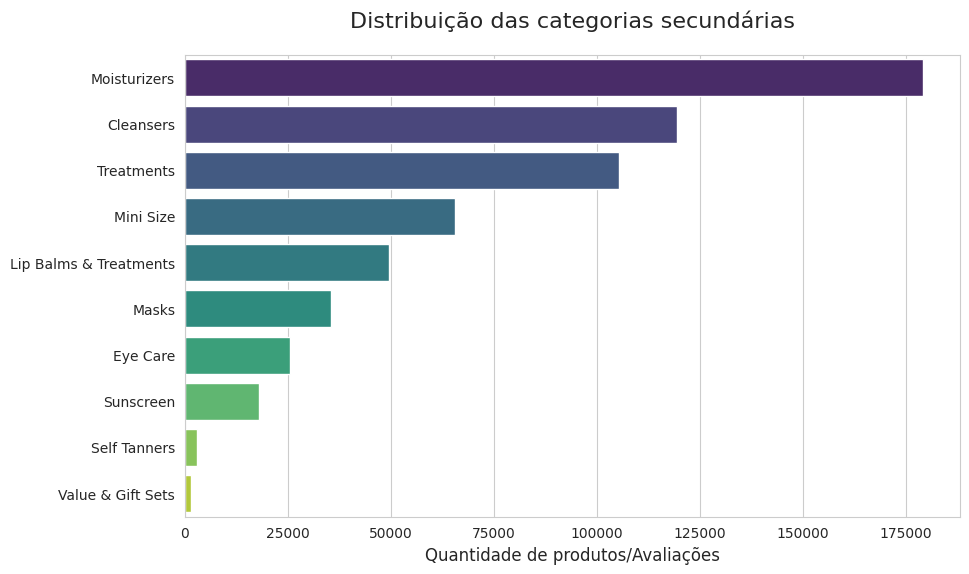

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))

all_secondary_counts = df['secondary_category'].value_counts(dropna=False)
ax = sns.barplot(x=all_secondary_counts.values, y=all_secondary_counts.index, palette='viridis')

ax.set_title('Distribuição das categorias secundárias', fontsize=16, pad=20)
ax.set_xlabel('Quantidade de produtos/Avaliações', fontsize=12)
ax.set_ylabel('')
plt.show()

In [ ]:
df.tertiary_category.unique()

array([nan, 'Face Wash & Cleansers', 'Face Oils', 'Moisturizers',
       'Facial Peels', 'Makeup Removers', 'Face Serums', 'BB & CC Creams',
       'Exfoliators', 'Blemish & Acne Treatments', 'Face Masks',
       'Face Wipes', 'Mists & Essences', 'Toners', 'Face Sunscreen',
       'Eye Creams & Treatments', 'For Face', 'Night Creams', 'Eye Masks'],
      dtype=object)

/tmp/ipython-input-3582883153.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tertiary_counts.values, y=tertiary_counts.index, palette='mako')


Text(0, 0.5, '')

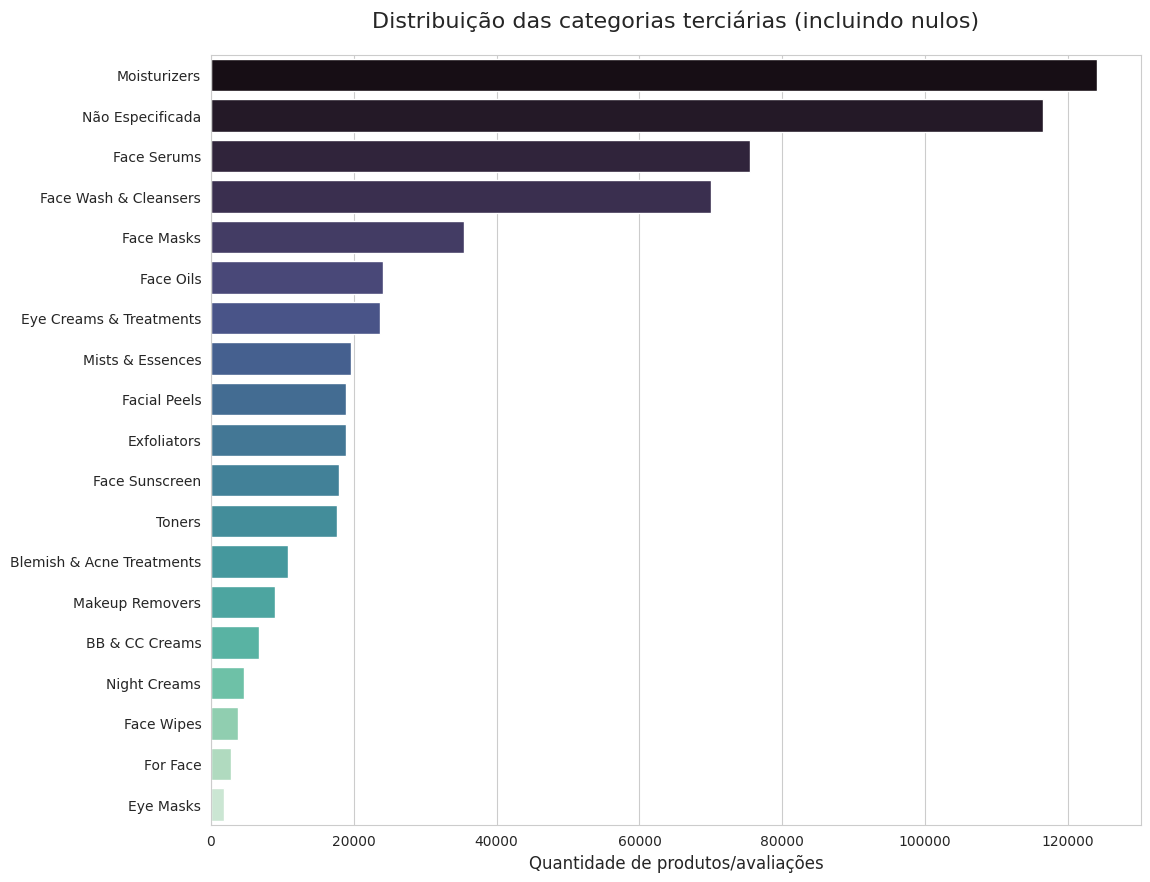

In [ ]:
tertiary_counts = df['tertiary_category'].value_counts(dropna=False)

tertiary_counts = tertiary_counts.rename(index={np.nan: 'Não Especificada'})

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

ax = sns.barplot(x=tertiary_counts.values, y=tertiary_counts.index, palette='mako')


ax.set_title('Distribuição das categorias terciárias (incluindo nulos)', fontsize=16, pad=20)
ax.set_xlabel('Quantidade de produtos/avaliações', fontsize=12)
ax.set_ylabel('')

In [ ]:
df.brand_name.nunique()

60

In [ ]:
df.brand_name.unique()

array(['NUDESTIX', 'LANEIGE', 'fresh', 'Josie Maran', 'First Aid Beauty',
       'Dr. Dennis Gross Skincare', 'belif', 'Farmacy', 'Drunk Elephant',
       'Youth To The People', 'The Ordinary', 'Sunday Riley', 'Dr. Jart+',
       'Rosebud Perfume Co.', 'Dermalogica', 'Peace Out', 'Origins',
       'Summer Fridays', 'CLINIQUE', 'KORRES', 'Tatcha',
       'SEPHORA COLLECTION', 'bareMinerals', 'Jack Black', 'Bobbi Brown',
       'Charlotte Tilbury', 'Caudalie', 'Glow Recipe', 'Supergoop!',
       'Kate Somerville', 'The INKEY List', 'OLEHENRIKSEN', 'SK-II',
       'Shiseido', 'Isle of Paradise', 'Estée Lauder', 'Clarins', 'Murad',
       "Kiehl's Since 1851", 'IT Cosmetics', 'Skinfix', 'tarte',
       'Wishful', 'goop', 'Biossance', 'Herbivore', 'Peter Thomas Roth',
       'MILK MAKEUP', 'Lancôme', 'Evian', 'Dior', 'innisfree', 'La Mer',
       'Sol de Janeiro', 'Algenist', 'REN Clean Skincare', 'GUERLAIN',
       'Dr. Brandt Skincare', "Paula's Choice", 'KORA Organics'],
      dtype=obje

/tmp/ipython-input-1948491894.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='crest_r')


Text(0, 0.5, '')

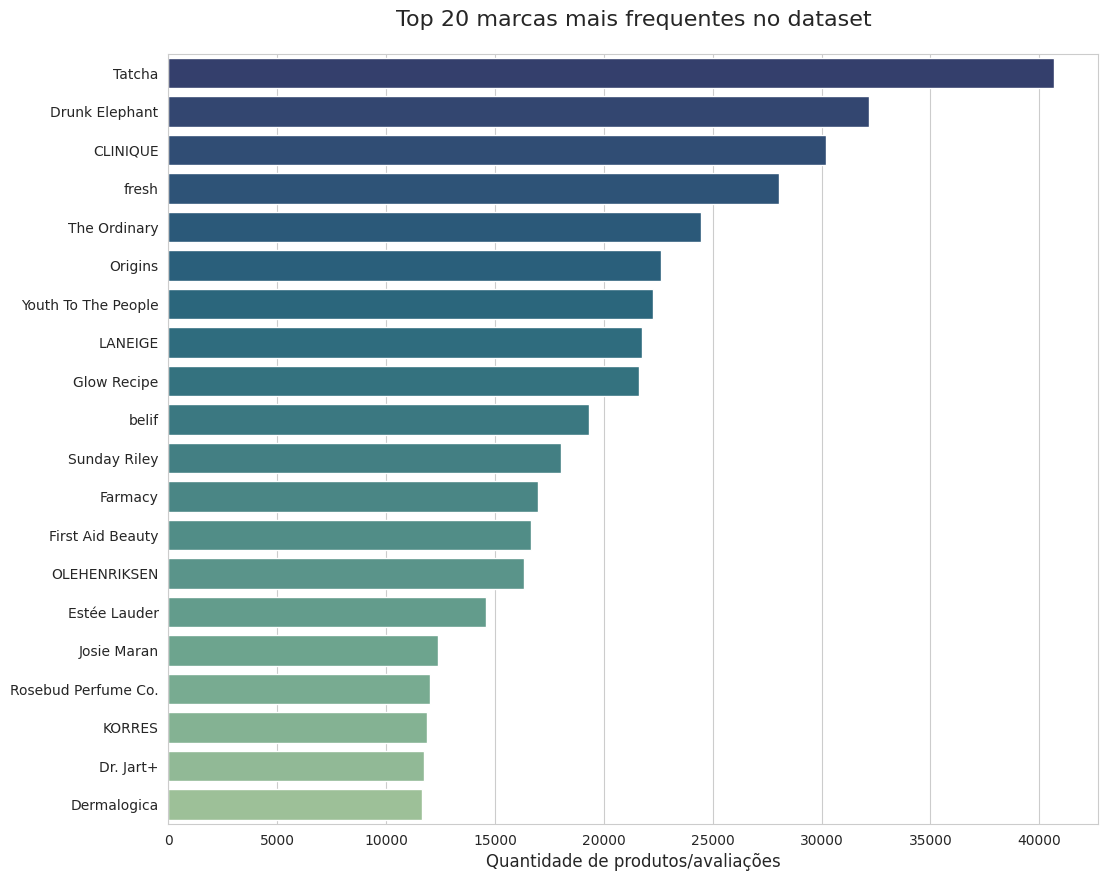

In [ ]:
top_20_brands = df['brand_name'].value_counts().nlargest(20)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

ax = sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='crest_r')

ax.set_title('Top 20 marcas mais frequentes no dataset', fontsize=16, pad=20)
ax.set_xlabel('Quantidade de produtos/avaliações', fontsize=12)
ax.set_ylabel('')


Text(0.5, 1.0, 'Distribuição do preço dos produtos')

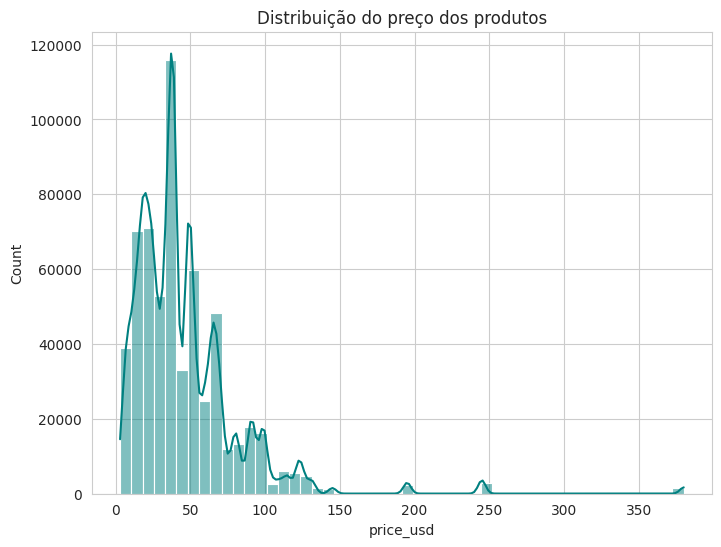

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['price_usd'], bins=50, kde=True, color='teal');
plt.title('Distribuição do preço dos produtos')

###A maior parte dos produtos se concentra na faixa de preço mais baixa (uma distribuição "assimétrica à direita").

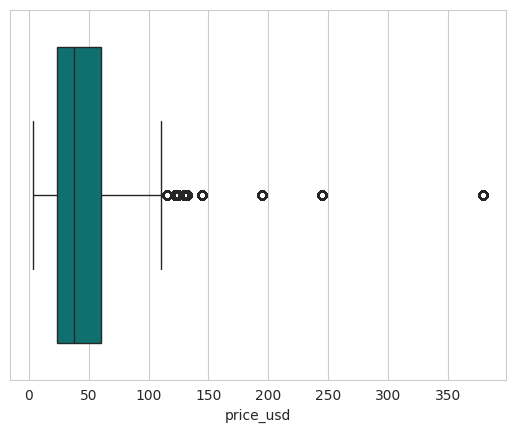

In [ ]:
sns.boxplot(x = df['price_usd'], color='teal');

###Existem alguns outliers, que representam os produtos mais caros, mas, como vimos no histograma, a maioria dos preços são valores mais baixos.

In [ ]:
df.columns

Index(['author_id', 'product_id', 'user_rating', 'is_recommended', 'skin_type',
       'skin_tone', 'product_name', 'brand_name', 'loves_count',
       'avg_product_rating', 'reviews', 'ingredients', 'price_usd',
       'highlights', 'secondary_category', 'tertiary_category'],
      dtype='object')

Text(0.5, 1.0, 'Distribuição dos "likes" e "loves" atribuídos aos produtos')

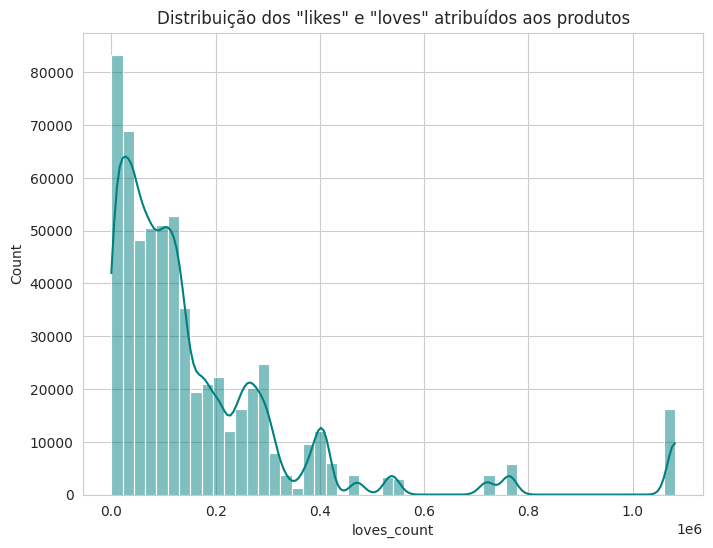

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['loves_count'], bins=50, kde=True, color='teal');
plt.title('Distribuição dos "likes" e "loves" atribuídos aos produtos')

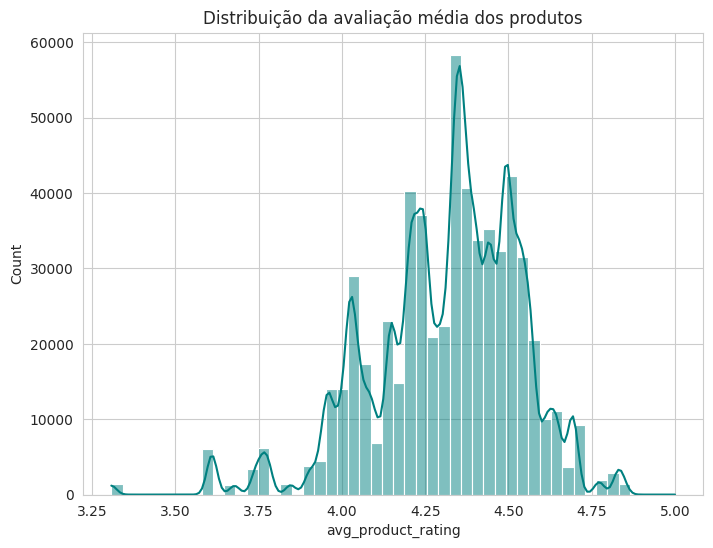

In [ ]:

plt.figure(figsize=(8, 6))
sns.histplot(df['avg_product_rating'], bins=50, kde=True, color='teal');
plt.title('Distribuição da avaliação média dos produtos');

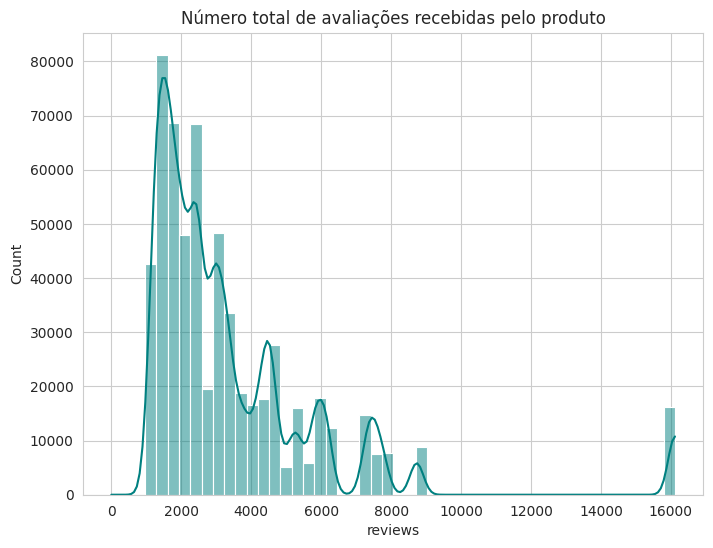

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(df['reviews'], bins=50, kde=True, color='teal');
plt.title('Número total de avaliações recebidas pelo produto');

In [ ]:
df.describe()

,user_rating,is_recommended,loves_count,avg_product_rating,reviews,price_usd
count,602130.000000,484644.000000,6.021300e+05,602130.000000,602130.000000,602130.000000
mean,4.311838,0.837922,1.684628e+05,4.312200,3483.104328,45.723937
std,1.143692,0.368522,2.045907e+05,0.221746,2763.378456,35.743990
min,1.000000,0.000000,0.000000e+00,3.307600,1.000000,3.000000
25%,4.000000,1.000000,4.225700e+04,4.192200,1706.000000,23.500000
50%,5.000000,1.000000,1.076070e+05,4.348000,2561.000000,38.000000
75%,5.000000,1.000000,2.107860e+05,4.482100,4375.000000,60.000000
max,5.000000,1.000000,1.081315e+06,5.000000,16118.000000,380.000000


* A avaliação média é de 4.3. A maioria dos produtos parece ser bem avaliada pelos clientes.

* O preço varia de 3 dólares a 245 dólares, com uma média de 43.85 dólares. A maioria dos produtos (75%) custa até 57 dólares, indicando que os produtos mais caros são outliers.

* A enorme diferença entre a média e o valor máximo (o desvio padrão também é muito alto) sugere que existem alguns produtos extremamente populares que são outliers. Isso é muito comum em dados de popularidade.

In [ ]:
df.is_recommended.unique()

array([ 1.,  0., nan])

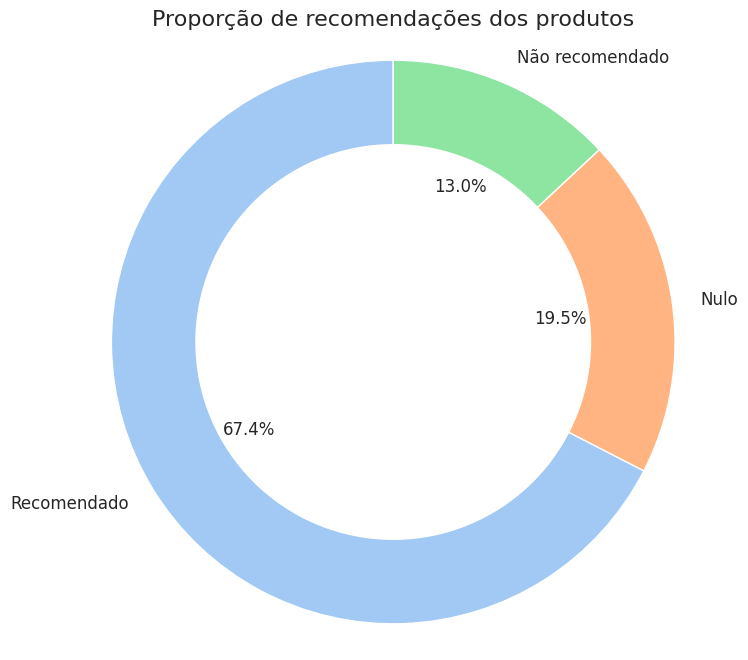

In [ ]:
    recommend_counts = df['is_recommended'].value_counts(dropna=False)

    labels = recommend_counts.index.map({1: 'Recomendado', 0: 'Não recomendado',
                                          np.nan: 'Nulo'})

    # Definir as cores
    colors = sns.color_palette('pastel')[0:len(recommend_counts)]
    plt.figure(figsize=(8, 8))
    plt.pie(recommend_counts, labels=labels, colors=colors,
            autopct='%.1f%%', # Formato da porcentagem
            startangle=90,
            textprops={'fontsize': 12})

    centre_circle = plt.Circle((0,0),0.70,fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

    # Adicionar o título
    plt.title('Proporção de recomendações dos produtos', fontsize=16)

    # Garantir que o gráfico seja um círculo
    plt.axis('equal')

    # Mostrar o gráfico
    plt.show()